<img src="banner.jpg">

#### José Henrique Roveda

# Lung CT images visualization

Computed tomography (CT) of the chest uses special x-ray equipment to examine abnormalities found in other imaging tests and to help diagnose the cause of unexplained cough, shortness of breath, chest pain, fever and other chest symptoms. CT scanning is fast, painless, noninvasive and accurate. Because it is able to detect very small nodules in the lung, chest CT is especially effective for diagnosing lung cancer at its earliest, most curable stage.

## About DICOM

DICOM (Digital Imaging and Communications in Medicine) is a standard for handling, storing, printing, and transmitting information in medical imaging. It includes a file format definition and a network communications protocol.

The communication protocol is an application protocol that uses TCP/IP to communicate between systems. DICOM files can be exchanged between two entities that are capable of receiving image and patient data in DICOM format.

### Data source

The Cancer Genome Atlas Lung Adenocarcinoma (TCGA-LUAD) data collection is part of a larger effort to build a research community focused on connecting cancer phenotypes to genotypes by providing clinical images matched to subjects from The Cancer Genome Atlas (TCGA). [Complete information in this link](https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD)

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydicom as dicom
from glob import glob

In [5]:
df = pd.read_csv('overview.csv')

In [6]:
df.describe()

,Unnamed: 0,Age,id
count,100.000000,100.000000,100.000000
mean,49.500000,67.480000,49.500000
std,29.011492,9.274141,29.011492
min,0.000000,39.000000,0.000000
25%,24.750000,61.000000,24.750000
50%,49.500000,70.000000,49.500000
75%,74.250000,74.000000,74.250000
max,99.000000,83.000000,99.000000


In [7]:
df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


### Show a histogram of the age distribution

In [9]:
sns.set(style='darkgrid', font_scale=1.1)

Text(0, 0.5, 'Count')

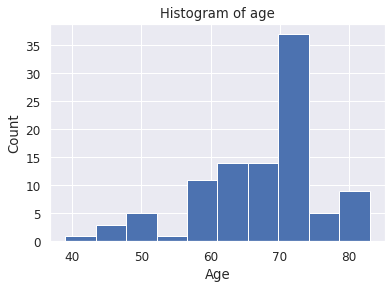

In [197]:
df['Age'].hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Count')

### Processing DICOM data

In [13]:
print(f"Count of lung computed tomography images: {len(os.listdir('dicom_dir'))}")

Count of lung computed tomography images: 100


In [31]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [32]:
ct_data = process_data('dicom_dir/*.dcm')

In [33]:
ct_data.head()

,path,file,ID,Age,Contrast,Modality
0,dicom_dir/ID_0003_AGE_0075_CONTRAST_1_CT.dcm,ID_0003_AGE_0075_CONTRAST_1_CT.dcm,0003,75,True,CT
1,dicom_dir/ID_0045_AGE_0074_CONTRAST_1_CT.dcm,ID_0045_AGE_0074_CONTRAST_1_CT.dcm,0045,74,True,CT
2,dicom_dir/ID_0017_AGE_0060_CONTRAST_1_CT.dcm,ID_0017_AGE_0060_CONTRAST_1_CT.dcm,0017,60,True,CT
3,dicom_dir/ID_0010_AGE_0060_CONTRAST_1_CT.dcm,ID_0010_AGE_0060_CONTRAST_1_CT.dcm,0010,60,True,CT
4,dicom_dir/ID_0086_AGE_0073_CONTRAST_0_CT.dcm,ID_0086_AGE_0073_CONTRAST_0_CT.dcm,0086,73,False,CT


### Data consistency
Checking if the content in both data is the same

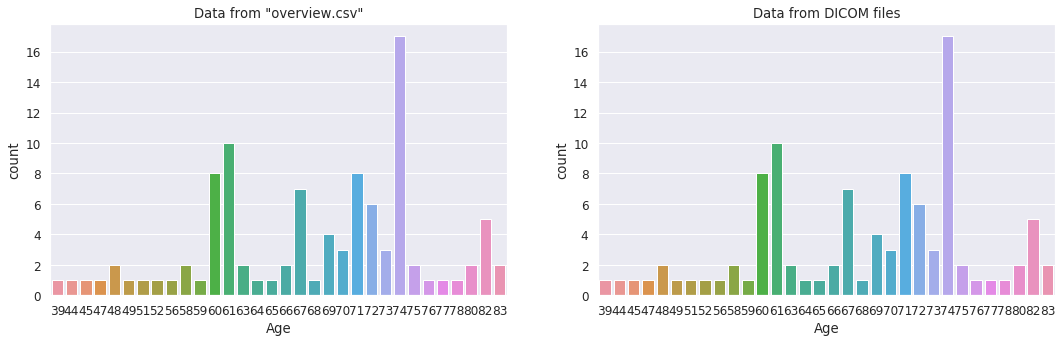

In [202]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
s1 = sns.countplot(df['Age'], ax=ax1)
s1.set_title('Data from "overview.csv"')
s2 = sns.countplot(ct_data['Age'], ax=ax2)
s2.set_title('Data from DICOM files')
plt.show()

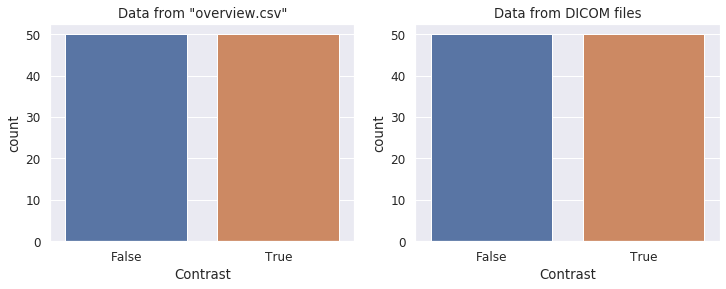

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
s1 = sns.countplot(df['Contrast'], ax=ax1)
s1.set_title('Data from "overview.csv"')
s2 = sns.countplot(ct_data['Contrast'], ax=ax2)
s2.set_title('Data from DICOM files')
plt.show()

### Visualizing DICOM images

A voxel represents a single sample, or data point, on a regularly spaced, three-dimensional grid.

In [61]:
def show_imgs(data, dim=20, imtype='DICOM'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(5,5, figsize=(25,25))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.read_file(data_row['path'])
        ax[i//5, i%5].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title('Modality: {Modality} Patient age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

In [48]:
def get_voxel(dicom_files):
    ds = [dicom.read_file(f) for f in dicom_files]
    try:
        voxel_ndarray, ijk_to_xyz = dicom_np.combine_slices(ds)
    except dicom_np.DicomImportException as e:
            raise
    return voxel_ndarray

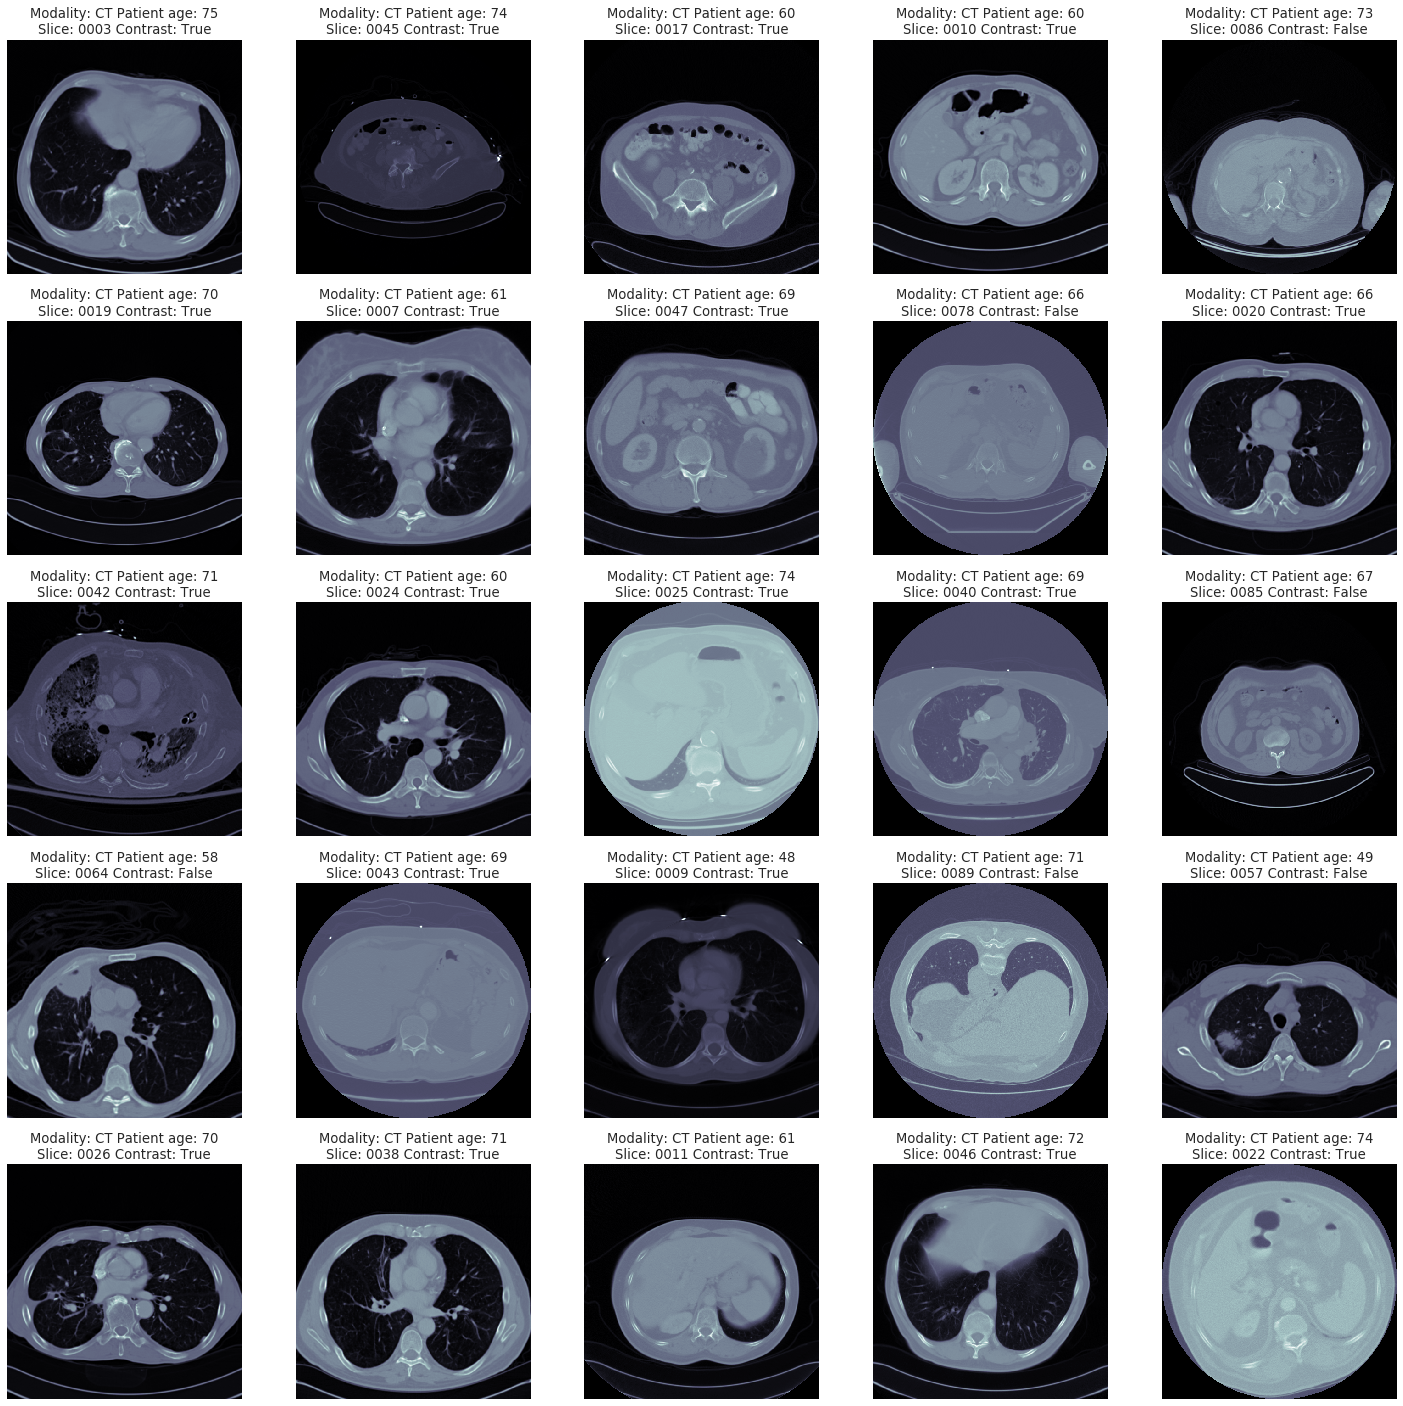

In [63]:
show_imgs(ct_data, 25, 'DICOM')

### Reading deailed information in a DICOM file
Using *dicom* package to read a dicom file and show the information

In [123]:
def detailed_information(dicom_data, data_len, ct_num):
    d_file_path = list(dicom_data[:data_len].T.to_dict().values())[ct_num]['path']
    d_file_dataset = dicom.read_file(d_file_path)
    return d_file_dataset

In [124]:
# Reading details about one CT
detailed_information(ct_data, len(ct_data), 0)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.192037407762297881472182436049
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 450
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1

In [134]:
def ct_details(dicom_data, data_len):
    details = []
    infos = []
    for i in range(data_len):
        details.append(detailed_information(dicom_data, data_len, i))
    for item in details:
        infos.append({
            "Modality": item.Modality,
            "BodyPartExamined": item.BodyPartExamined,
            "PatientAge": item.PatientAge,
            "PatientSex": item.PatientSex,
            "Manufacturer": item.Manufacturer,
            "ManufacturerModelName": item.ManufacturerModelName
        })
    return infos

In [135]:
# Reading information about all CT's
details = ct_details(ct_data, len(ct_data))
details

[{'Modality': 'CT',
  'BodyPartExamined': 'CHEST',
  'PatientAge': '075Y',
  'PatientSex': 'M',
  'Manufacturer': 'SIEMENS',
  'ManufacturerModelName': 'Emotion'},
 {'Modality': 'CT',
  'BodyPartExamined': 'LUNG',
  'PatientAge': '074Y',
  'PatientSex': 'F',
  'Manufacturer': 'SIEMENS',
  'ManufacturerModelName': 'Sensation 16'},
 {'Modality': 'CT',
  'BodyPartExamined': 'CHEST',
  'PatientAge': '060Y',
  'PatientSex': 'M',
  'Manufacturer': 'SIEMENS',
  'ManufacturerModelName': 'SOMATOM PLUS 4'},
 {'Modality': 'CT',
  'BodyPartExamined': 'CHEST',
  'PatientAge': '060Y',
  'PatientSex': 'M',
  'Manufacturer': 'SIEMENS',
  'ManufacturerModelName': 'Volume Zoom'},
 {'Modality': 'CT',
  'BodyPartExamined': 'LUNG',
  'PatientAge': '073Y',
  'PatientSex': 'F',
  'Manufacturer': 'SIEMENS',
  'ManufacturerModelName': 'Biograph 6'},
 {'Modality': 'CT',
  'BodyPartExamined': 'CHEST',
  'PatientAge': '070Y',
  'PatientSex': 'M',
  'Manufacturer': 'SIEMENS',
  'ManufacturerModelName': 'Sensation 

In [164]:
df_details = pd.DataFrame(details)
df_details

,Modality,BodyPartExamined,PatientAge,PatientSex,Manufacturer,ManufacturerModelName
0,CT,CHEST,075Y,M,SIEMENS,Emotion
1,CT,LUNG,074Y,F,SIEMENS,Sensation 16
2,CT,CHEST,060Y,M,SIEMENS,SOMATOM PLUS 4
3,CT,CHEST,060Y,M,SIEMENS,Volume Zoom
4,CT,LUNG,073Y,F,SIEMENS,Biograph 6
...,...,...,...,...,...,...
95,CT,CHEST,061Y,F,SIEMENS,Volume Zoom
96,CT,CHEST,074Y,F,SIEMENS,Volume Zoom
97,CT,CHEST,082Y,F,SIEMENS,Volume Zoom
98,CT,LUNG,047Y,M,SIEMENS,Sensation 16


In [165]:
df_details['PatientAge'] = df_details['PatientAge'].str.replace('Y','')
df_details

,Modality,BodyPartExamined,PatientAge,PatientSex,Manufacturer,ManufacturerModelName
0,CT,CHEST,075,M,SIEMENS,Emotion
1,CT,LUNG,074,F,SIEMENS,Sensation 16
2,CT,CHEST,060,M,SIEMENS,SOMATOM PLUS 4
3,CT,CHEST,060,M,SIEMENS,Volume Zoom
4,CT,LUNG,073,F,SIEMENS,Biograph 6
...,...,...,...,...,...,...
95,CT,CHEST,061,F,SIEMENS,Volume Zoom
96,CT,CHEST,074,F,SIEMENS,Volume Zoom
97,CT,CHEST,082,F,SIEMENS,Volume Zoom
98,CT,LUNG,047,M,SIEMENS,Sensation 16


In [166]:
df_details['PatientAge'] = df_details['PatientAge'].str.lstrip('0')
df_details

,Modality,BodyPartExamined,PatientAge,PatientSex,Manufacturer,ManufacturerModelName
0,CT,CHEST,75,M,SIEMENS,Emotion
1,CT,LUNG,74,F,SIEMENS,Sensation 16
2,CT,CHEST,60,M,SIEMENS,SOMATOM PLUS 4
3,CT,CHEST,60,M,SIEMENS,Volume Zoom
4,CT,LUNG,73,F,SIEMENS,Biograph 6
...,...,...,...,...,...,...
95,CT,CHEST,61,F,SIEMENS,Volume Zoom
96,CT,CHEST,74,F,SIEMENS,Volume Zoom
97,CT,CHEST,82,F,SIEMENS,Volume Zoom
98,CT,LUNG,47,M,SIEMENS,Sensation 16


### Relationship between age and sex of patients who had CT scans

In [167]:
df_details.PatientAge = pd.to_numeric(df_details['PatientAge'])
df_details

,Modality,BodyPartExamined,PatientAge,PatientSex,Manufacturer,ManufacturerModelName
0,CT,CHEST,75,M,SIEMENS,Emotion
1,CT,LUNG,74,F,SIEMENS,Sensation 16
2,CT,CHEST,60,M,SIEMENS,SOMATOM PLUS 4
3,CT,CHEST,60,M,SIEMENS,Volume Zoom
4,CT,LUNG,73,F,SIEMENS,Biograph 6
...,...,...,...,...,...,...
95,CT,CHEST,61,F,SIEMENS,Volume Zoom
96,CT,CHEST,74,F,SIEMENS,Volume Zoom
97,CT,CHEST,82,F,SIEMENS,Volume Zoom
98,CT,LUNG,47,M,SIEMENS,Sensation 16


Text(0, 0.5, 'Count')

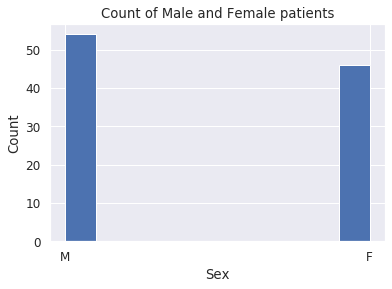

In [177]:
df_details['PatientSex'].hist()
plt.title('Count of Male and Female patients')
plt.xlabel('Sex')
plt.ylabel('Count')

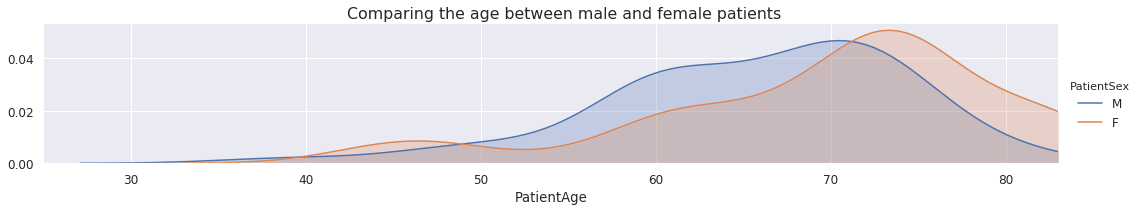

In [181]:
fig = sns.FacetGrid(df_details, hue='PatientSex', aspect=5)
fig.map(sns.kdeplot, 'PatientAge', shade=True)
oldest = df_details['PatientAge'].max()
fig.set(xlim=(25, oldest))
plt.subplots_adjust(top=0.9)
fig.fig.suptitle('Comparing the age between male and female patients')
fig.add_legend()

In [188]:
print(f'The average age of patients who underwent CT scans is: {round(df_details["PatientAge"].mean())}')

The average age of patients who underwent CT scans is: 67


In [187]:
fem_data = df_details.loc[df_details['PatientSex'] == 'F']
male_data = df_details.loc[df_details['PatientSex'] == 'M']

print(f'The average age of Female patients who underwent CT scans is: {round(fem_data["PatientAge"].mean())}')
print(f'The average age of Male patients who underwent CT scans is: {round(male_data["PatientAge"].mean())}')

The average age of Female patients who underwent CT scans is: 70
The average age of Male patients who underwent CT scans is: 66


### Finally, an analysis of the most common manufacturers and models in this sample of CT scans

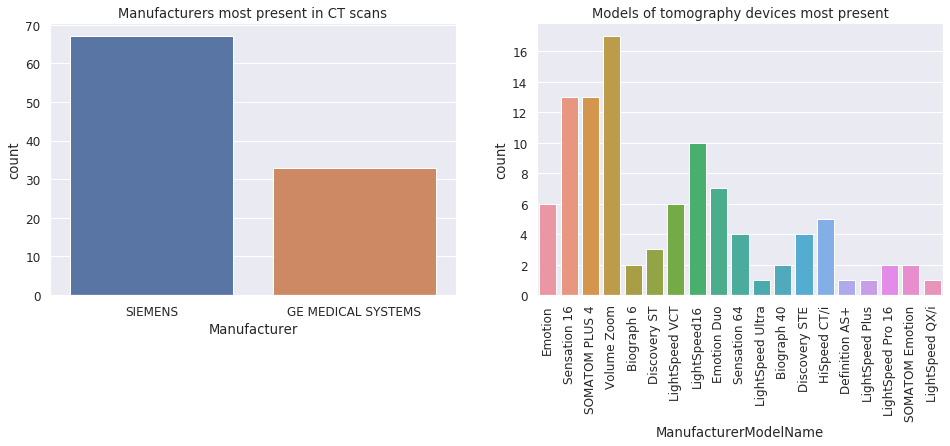

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
s1 = sns.countplot(df_details['Manufacturer'], ax=ax1)
s1.set_title('Manufacturers most present in CT scans')
s2 = sns.countplot(df_details['ManufacturerModelName'], ax=ax2)
s2.set_title('Models of tomography devices most present')
s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
plt.show()

For these CT scans, the most used device was manufactured by SIEMENS and the most present device model is the Volume Zoom.

![](`https://static.healthcare.siemens.com/siemens_hwem-hwem_ssxa_websites-context-root/wcm/idc/groups/public/@global/documents/image/mda3/ndq2/~edisp/im2015070925hc_300dpi-04530680/~renditions/im2015070925hc_300dpi-04530680~8.jpg`)

<img src="volumezoom.jpg">